In [29]:
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [30]:
#Task1 and 2
#1.using the history object in the source code, plot the loss and accuracy for both training data and validation data. 
#2.plot one of the images in the test data, and then do inferencing to check what is the prediction of the model on that single image in the test data

(train_images,train_labels),(test_images, test_labels) = mnist.load_data()
train_images.shape[1:]
#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')

#scale data
train_data /=255.0
test_data /=255.0

#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

784
Epoch 1/10
235/235 [==============================] - 3s 14ms/step - loss: 0.2695 - accuracy: 0.9169 - val_loss: 0.1178 - val_accuracy: 0.9621
Epoch 2/10
235/235 [==============================] - 3s 14ms/step - loss: 0.0923 - accuracy: 0.9717 - val_loss: 0.0807 - val_accuracy: 0.9740
Epoch 3/10
235/235 [==============================] - 3s 14ms/step - loss: 0.0573 - accuracy: 0.9823 - val_loss: 0.0802 - val_accuracy: 0.9752
Epoch 4/10
235/235 [==============================] - 3s 15ms/step - loss: 0.0398 - accuracy: 0.9877 - val_loss: 0.0737 - val_accuracy: 0.9794
Epoch 5/10
235/235 [==============================] - 4s 17ms/step - loss: 0.0281 - accuracy: 0.9911 - val_loss: 0.0623 - val_accuracy: 0.9822
Epoch 6/10
235/235 [==============================] - 5s 19ms/step - loss: 0.0220 - accuracy: 0.9929 - val_loss: 0.0777 - val_accuracy: 0.9793
Epoch 7/10
235/235 [==============================] - 4s 18ms/step - loss: 0.0162 - accuracy: 0.9944 - val_loss: 0.1041 - val_accuracy: 0.

313/313 [==============================] - 0s 2ms/step - loss: 0.0881 - accuracy: 0.9812
Evaluation result on Test Data : Loss = 0.08807748556137085, accuracy = 0.9811999797821045


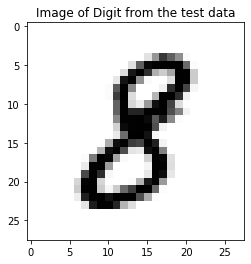

In [31]:
[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))
image_index = 110
plt.imshow(test_data[image_index].reshape(28, 28),cmap='Greys')
plt.title("Image of Digit from the test data")
plt.show()

In [32]:
pred = model.predict(test_data[image_index].reshape(1,784))
print("Predicted digit:",pred.argmax())


Predicted digit: 8


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


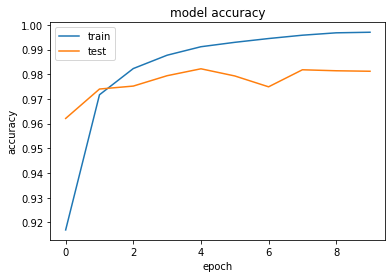

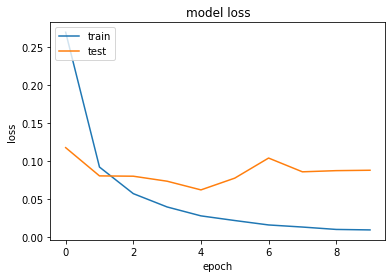

In [33]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

(28, 28)
784
Epoch 1/10
235/235 [==============================] - 7s 31ms/step - loss: 0.4741 - accuracy: 0.8586 - val_loss: 0.3022 - val_accuracy: 0.9064
Epoch 2/10
235/235 [==============================] - 8s 33ms/step - loss: 0.1747 - accuracy: 0.9467 - val_loss: 0.2198 - val_accuracy: 0.9343
Epoch 3/10
235/235 [==============================] - 8s 33ms/step - loss: 0.1180 - accuracy: 0.9636 - val_loss: 0.1291 - val_accuracy: 0.9616
Epoch 4/10
235/235 [==============================] - 8s 32ms/step - loss: 0.0854 - accuracy: 0.9730 - val_loss: 0.1375 - val_accuracy: 0.9575
Epoch 5/10
235/235 [==============================] - 9s 38ms/step - loss: 0.0643 - accuracy: 0.9786 - val_loss: 0.1111 - val_accuracy: 0.9694
Epoch 6/10
235/235 [==============================] - 8s 36ms/step - loss: 0.0493 - accuracy: 0.9842 - val_loss: 0.0929 - val_accuracy: 0.9743
Epoch 7/10
235/235 [==============================] - 8s 36ms/step - loss: 0.0395 - accuracy: 0.9871 - val_loss: 0.1326 - val_acc

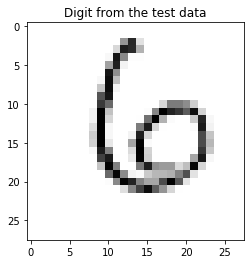

In [52]:
#Task3
#3.We had used 2 hidden layers and relu activation. Try to change the number of hidden layer and the activation to tanh or sigmoid and see what happens

(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

print(train_images.shape[1:])
#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature

dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

#convert data to float and scale values between 0 and 1

train_data = train_data.astype('float')
test_data = test_data.astype('float')

#scale data

train_data /=255.0
test_data /=255.0

#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network
model = Sequential()
model.add(Dense(512, activation='tanh', input_shape=(dimData,)))
model.add(Dense(512, activation='tanh'))
model.add(Dense(512, activation='tanh'))
model.add(Dense(400, activation='tanh'))
model.add(Dense(400, activation='tanh'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))
image_index = 100
plt.imshow(test_data[image_index].reshape(28, 28),cmap='Greys')
plt.title("Digit from the test data")
plt.show()




In [53]:
pred = model.predict(test_data[image_index].reshape(1,784))
print("Predicted digit:",pred.argmax())

Predicted digit: 6


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


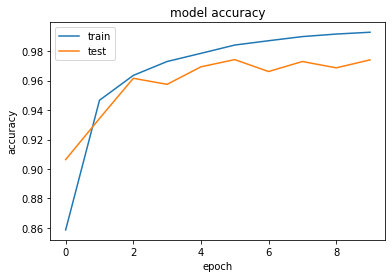

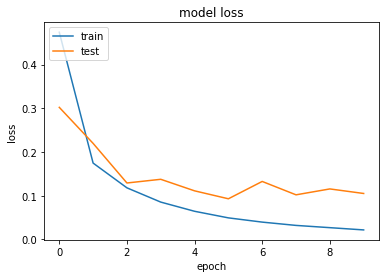

In [54]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

(28, 28)
784
Epoch 1/10
235/235 [==============================] - 6s 27ms/step - loss: 0.5181 - accuracy: 0.8438 - val_loss: 0.2483 - val_accuracy: 0.9237
Epoch 2/10
235/235 [==============================] - 6s 27ms/step - loss: 0.2260 - accuracy: 0.9296 - val_loss: 0.1903 - val_accuracy: 0.9424
Epoch 3/10
235/235 [==============================] - 7s 29ms/step - loss: 0.1718 - accuracy: 0.9469 - val_loss: 0.2460 - val_accuracy: 0.9243
Epoch 4/10
235/235 [==============================] - 8s 32ms/step - loss: 0.1412 - accuracy: 0.9567 - val_loss: 0.1645 - val_accuracy: 0.9490
Epoch 5/10
235/235 [==============================] - 8s 35ms/step - loss: 0.1230 - accuracy: 0.9616 - val_loss: 0.1832 - val_accuracy: 0.9442
Epoch 6/10
235/235 [==============================] - 11s 45ms/step - loss: 0.1144 - accuracy: 0.9652 - val_loss: 0.1725 - val_accuracy: 0.9495
Epoch 7/10
235/235 [==============================] - 8s 32ms/step - loss: 0.1026 - accuracy: 0.9674 - val_loss: 0.1499 - val_ac

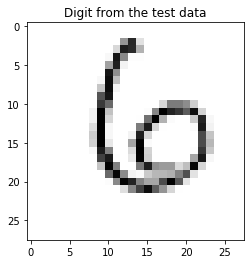

In [56]:
#Task4
#Run the same code without scaling the images, how the accuracy changes?
(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

print(train_images.shape[1:])
#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature

dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

#convert data to float and scale values between 0 and 1

train_data = train_data.astype('float')
test_data = test_data.astype('float')

#scale data

# train_data /=255.0
# test_data /=255.0

#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network
model = Sequential()
model.add(Dense(512, activation='tanh', input_shape=(dimData,)))
model.add(Dense(512, activation='tanh'))
model.add(Dense(512, activation='tanh'))
model.add(Dense(400, activation='tanh'))
model.add(Dense(400, activation='tanh'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))
image_index = 100
plt.imshow(test_data[image_index].reshape(28, 28),cmap='Greys')
plt.title("Digit from the test data")
plt.show()




In [57]:
pred = model.predict(test_data[image_index].reshape(1,784))
print("Predicted digit:",pred.argmax())

Predicted digit: 6


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


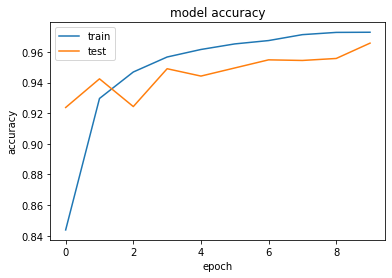

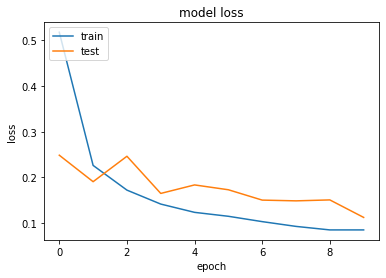

In [58]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()